In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from imblearn.over_sampling import SMOTE
import warnings   
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [8]:
# Read the csv file using pandas
df = pd.read_csv('obese.csv')

# Check the first 5 rows in the dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
# check null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
# check data type
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [13]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [14]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [59]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

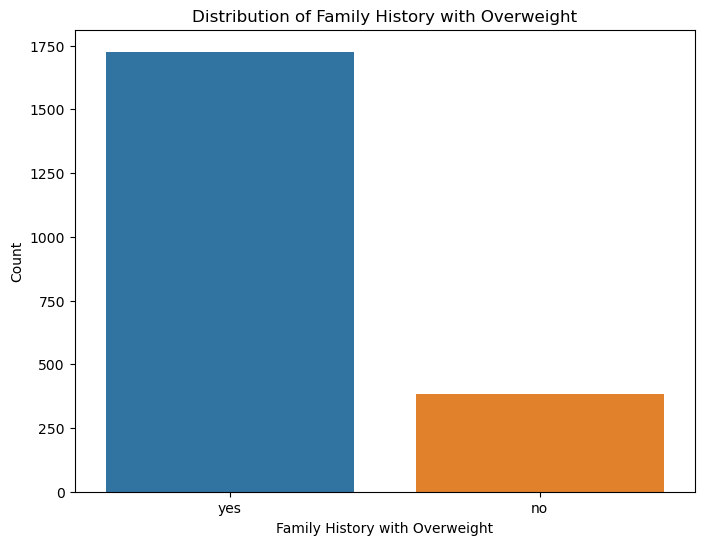

In [60]:
# Bar plot for familt history with obesity
counts = df['family_history_with_overweight'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values)

# Add labels and title
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.title('Distribution of Family History with Overweight')

# Show the plot
plt.show()

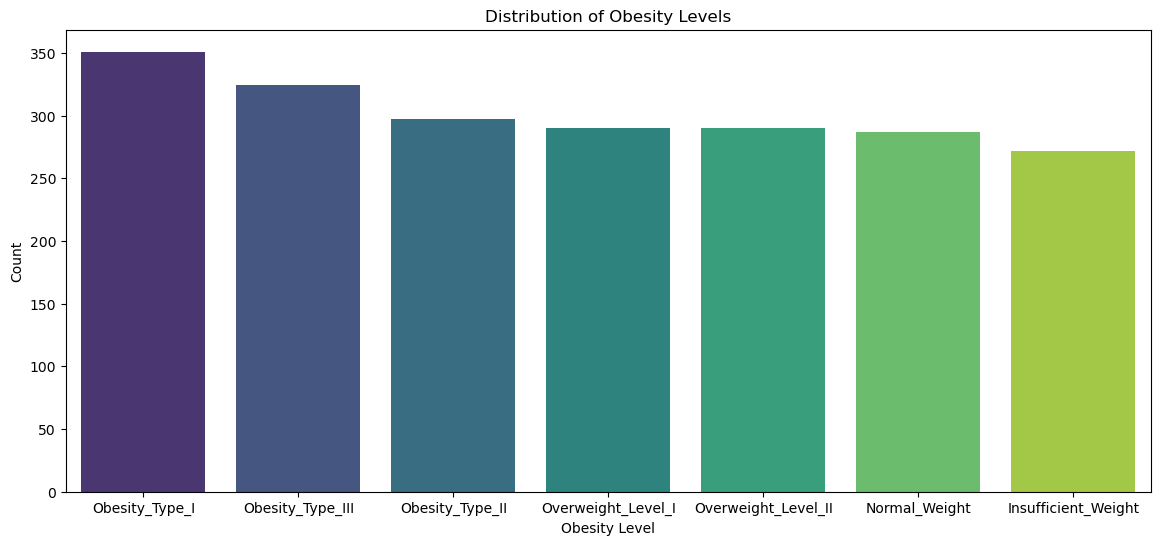

In [64]:
# Obesity level (bar plot)
counts = df['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Distribution of Obesity Levels')

# Show the plot
plt.show()

In [15]:
df1 = df.copy()

In [16]:
le = LabelEncoder()
# convert the items with object datatype to numeric 
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

In [17]:
df1.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4
2110,0,23.664709,1.738836,133.472641,1,1,3.0,3.0,2,0,2.863513,0,1.026452,0.714137,2,3,4


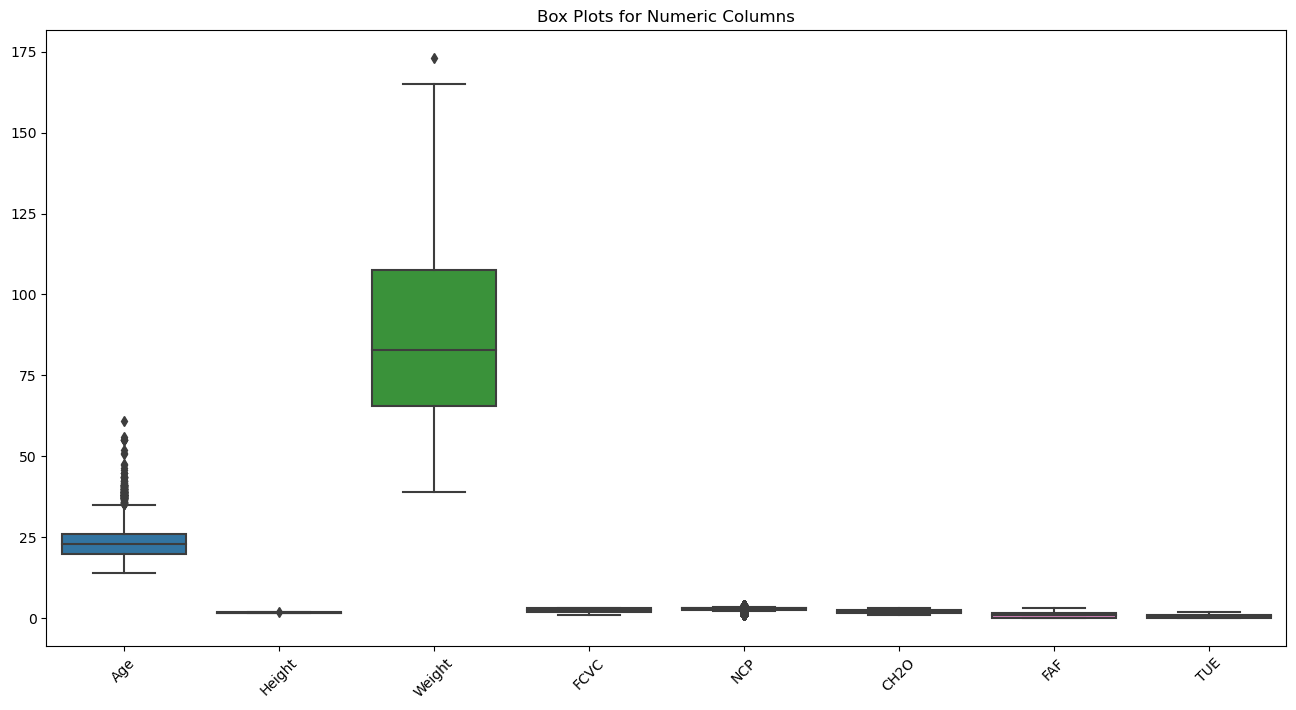

In [71]:
# Box plot for outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.title('Box Plots for Numeric Columns')
plt.xticks(rotation=45)
plt.show()

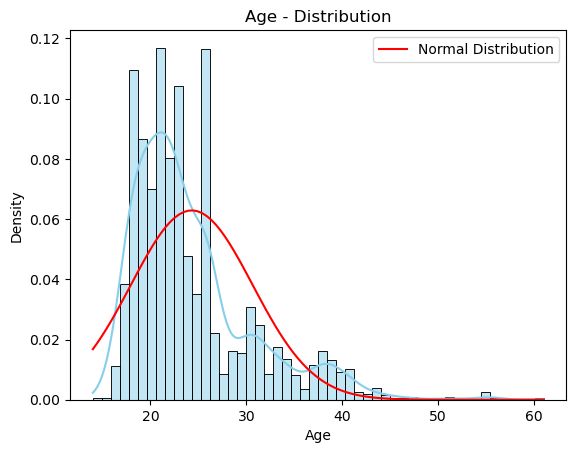

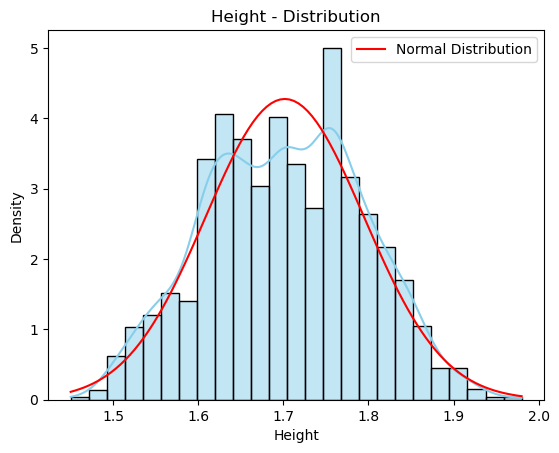

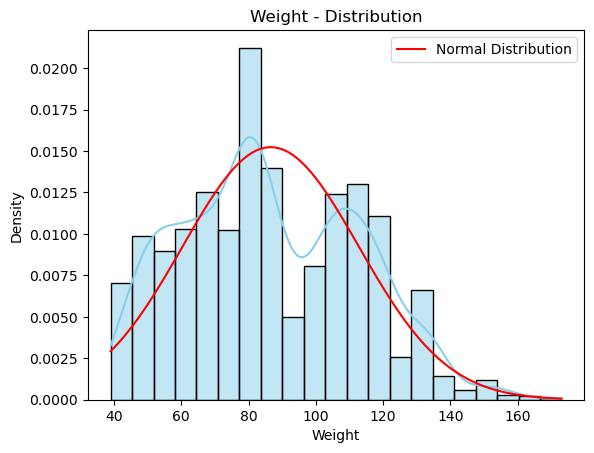

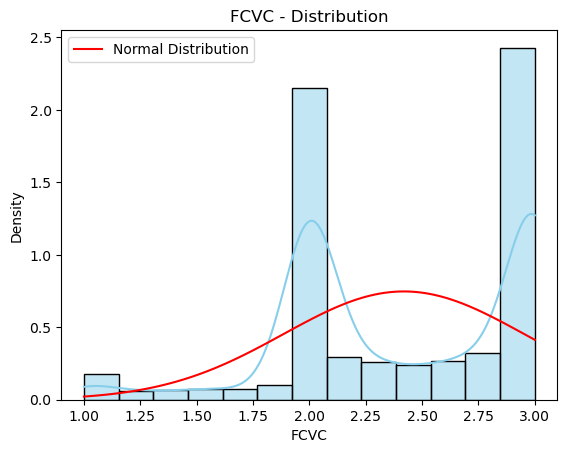

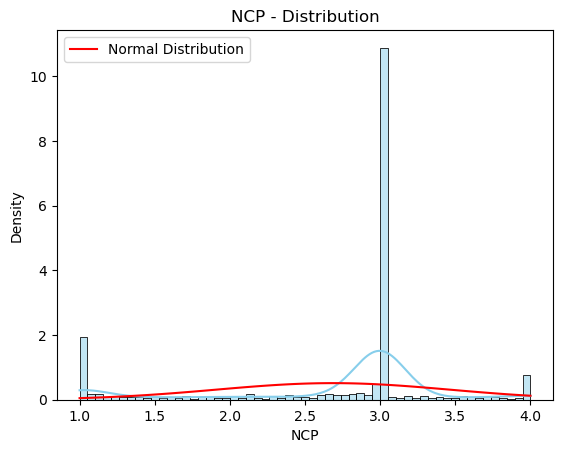

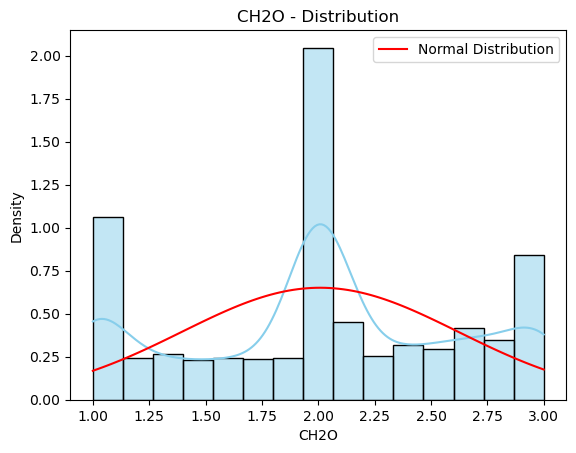

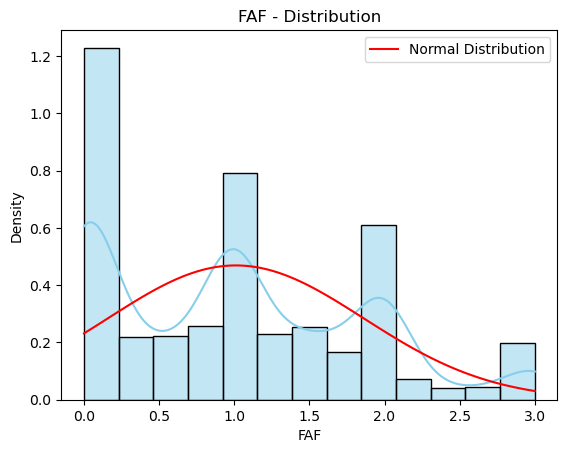

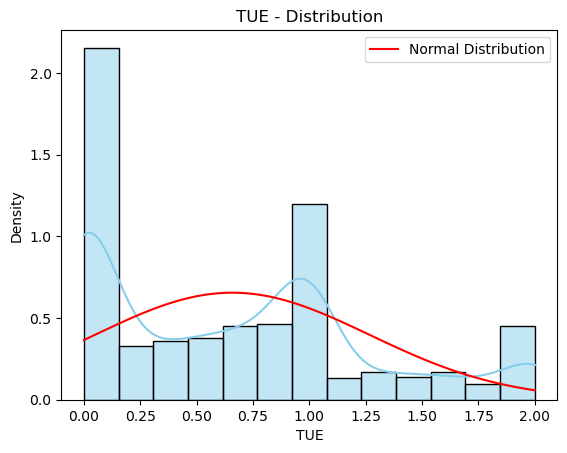

In [91]:
from scipy.stats import norm

# Visualize the distribution of numerical columns using a normal distribution
numerical_columns = df.select_dtypes(include='number').columns
for column in numerical_columns:
    plt.figure()
    
    # Plot histogram
    sns.histplot(data=df[column], kde=True, color='skyblue', stat='density')
    
    # Fit a normal distribution curve
    mu, sigma = norm.fit(df[column])
    x = np.linspace(df[column].min(), df[column].max(), 100)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, 'r-', label='Normal Distribution')
    
    plt.title(column + " - Distribution")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

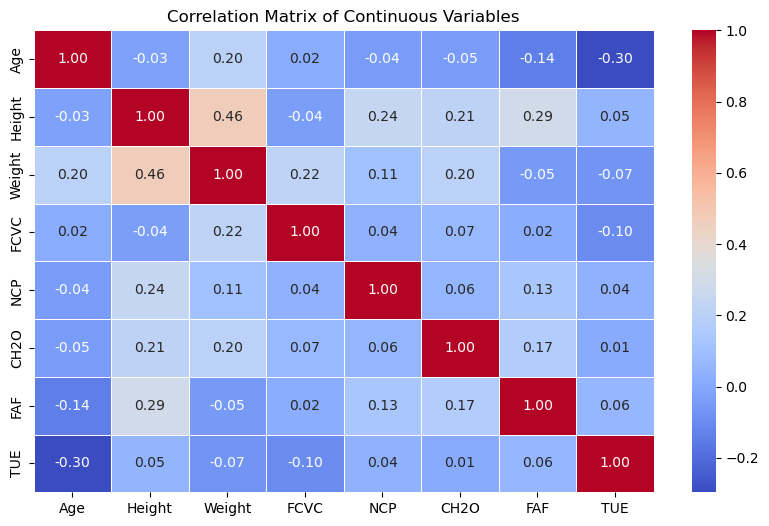

In [73]:
# plotting correlation matrix for continous variables 
continuous_variables = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = continuous_variables.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [74]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [18]:
# split data into class label,y, and attribute, X

X = df1.drop('family_history_with_overweight', axis=1)
y = df1.family_history_with_overweight

In [19]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: family_history_with_overweight, dtype: int64

In [20]:
y.value_counts()

1    1726
0     385
Name: family_history_with_overweight, dtype: int64

In [21]:
X.head()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [22]:
X.tail()

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,0,20.976842,1.710730,131.408528,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4
2110,0,23.664709,1.738836,133.472641,1,3.0,3.0,2,0,2.863513,0,1.026452,0.714137,2,3,4


In [76]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=df1['family_history_with_overweight'].unique(), y=df1['family_history_with_overweight'])
print("Class Weights:", dict(zip(df1['family_history_with_overweight'].unique(), class_weights)))

Class Weights: {1: 0.6115295480880649, 0: 2.7415584415584417}


In [23]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

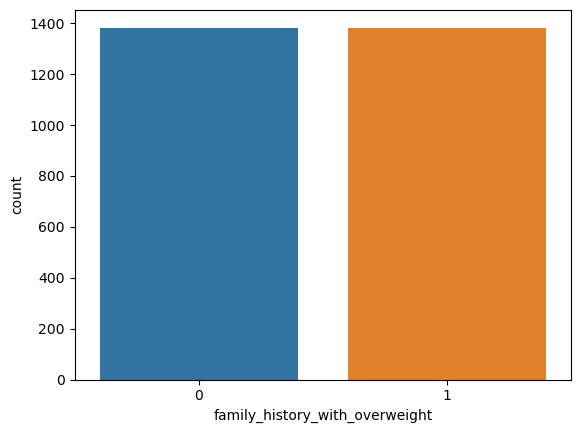

In [26]:
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=0)
X_train, y_train = resampler.fit_resample(X_train,y_train)

sns.countplot(x= y_train)

In [79]:
y_train.value_counts()

1    1383
0    1383
Name: family_history_with_overweight, dtype: int64

In [80]:
# Scale values in X cols using standardScaler
scaler = StandardScaler()
# Feed the scaler with data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [32]:
# Decision tree clasiifer model and fit the classifier
classifier_DTC = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier_DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [81]:
# Predicting the values of y_test from X_test from Decision Tree classifier 
y_pred_DTC = classifier_DTC.predict(X_test)
y_pred_DTC

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,

In [82]:
# Checking accuracy, f1 score, recall, precision,cm, and classification report
from sklearn import metrics
accuracy_DTC = metrics.accuracy_score(y_test, y_pred_DTC)
f1_score_DTC = metrics.f1_score(y_test, y_pred_DTC)
recall_DTC = metrics.recall_score(y_test, y_pred_DTC)
precision_DTC = metrics.precision_score(y_test, y_pred_DTC)
cm_DTC = metrics.confusion_matrix(y_test, y_pred_DTC)

classification_report_D = metrics.classification_report(y_test, y_pred_DTC)

print('Accuracy Score:', accuracy_DTC)
print('Precision:', precision_DTC)
print('Confusion Matrix:') 
print(cm_DTC)
print('F1 Score:', f1_score_DTC)
print('Recall:', recall_DTC)
print('Classification Report')
print(classification_report_DTC)


Accuracy Score: 0.8605200945626478
Precision: 0.9329268292682927
Confusion Matrix:
[[ 58  22]
 [ 37 306]]
F1 Score: 0.9120715350223547
Recall: 0.892128279883382
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        80
           1       0.93      0.89      0.91       343

    accuracy                           0.86       423
   macro avg       0.77      0.81      0.79       423
weighted avg       0.87      0.86      0.86       423



In [43]:
# checking for overfitting
# Make predictions on the test and training set
y_test_pred_DTC = classifier_DTC.predict(X_test)
y_train_pred_DTC = classifier_DTC.predict(X_train)

# Calculate the accuracy on test and training set
train_accuracy_DTC = metrics.accuracy_score(y_train, y_train_pred_DTC)
test_accuracy_DTC = metrics.accuracy_score(y_test, y_test_pred_DTC)
print("Training Accuracy:", train_accuracy_DTC)
print("Test Accuracy:", test_accuracy_DTC)

Training Accuracy: 1.0
Test Accuracy: 0.8605200945626478


In [54]:
# Cross validation

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(classifier_DTC, X, y, cv=5, scoring=scoring)
# Results
cv_accuracy_DTC = np.mean(cv_results['test_accuracy'])
cv_precision_DTC = np.mean(cv_results['test_precision'])
cv_recall_DTC = np.mean(cv_results['test_recall'])
cv_f1_DTC = np.mean(cv_results['test_f1'])
report_DTC = metrics.classification_report(y_test, y_prediction_rf)


# Print the results
print("Cross-Validation Results:")
print("Accuracy:", cv_accuracy_DTC)
print("Recall:", cv_recall_DTC)
print("F1 Score:", cv_f1_DTC)
print("Precision:", cv_precision_DTC)
print("Precision:", report_DTC)



Cross-Validation Results:
Accuracy: 0.8120668212833182
Recall: 0.85767613303175
F1 Score: 0.8704830895160427
Precision: 0.9039829102276838
Precision:               precision    recall  f1-score   support

           0       0.65      0.78      0.71        80
           1       0.95      0.90      0.92       343

    accuracy                           0.88       423
   macro avg       0.80      0.84      0.82       423
weighted avg       0.89      0.88      0.88       423



In [44]:
cm_DTC = metrics.confusion_matrix(y_test, y_pred_DTC)

In [45]:
print(cm_DTC)

[[ 58  22]
 [ 37 306]]


In [46]:
# Random forest classifier 
rand_fc =  RandomForestClassifier(random_state=42) #classifier

In [86]:
# find optimal n estiomators
n_list = [20, 60, 150, 250, 300] # list of n estimators values to try


# Initialize an empty list to store the cross-validation scores
val_scores = []

# using for loop to iterate over the n estimator values
for n_estimators in n_list:
    rand_fc.set_params(n_estimators=n_estimators)
    
    # Perform cross-validation and calculate the mean accuracy
    scores = cross_val_score(rand_fc, X, y, cv=5)
    mean_accuracy = np.mean(scores)
    val_scores.append(mean_accuracy)
    print(mean_accuracy)

0.8045107727471346
0.8011988392547028
0.8059292124634465
0.8049880676279789
0.8049880676279789


In [48]:
# Find index of the maximum mean accuracy
best_index = np.argmax(val_scores)

# Get the optimal number of estimators
optimal_n = n_list[best_index]

print("Optimal number of estimators:", optimal_n)

Optimal number of estimators: 150


In [49]:
# Create a random forest classifier with the optimal n
rand_fc2 = RandomForestClassifier(n_estimators=150, random_state=42)

In [50]:
# Train classifier
rand_fc2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [51]:
# Predictions on test data
y_prediction_rf = rand_fc2.predict(X_test)
y_prediction_rf

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,

In [53]:
# Calcluate perfomance of RF classifier
precision_RFC = metrics.precision_score(y_test, y_prediction_rf)
accuracy_RFC = metrics.accuracy_score(y_test, y_prediction_rf)
recall_RFC= metrics.recall_score(y_test, y_prediction_rf)
f1_score_RFC = metrics.f1_score(y_test, y_prediction_rf)
report_RFC = metrics.classification_report(y_test, y_prediction_rf)

print("Precision:", precision_RFC)
print("Accuracy:", accuracy_RFC)
print("Recall:", recall_RFC)
print('F1 Score:', f1_score_RFC)
print("Classification Report:")
print(report_RFC)

Precision: 0.9451219512195121
Accuracy: 0.8794326241134752
Recall: 0.9037900874635568
F1 Score: 0.923994038748137
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        80
           1       0.95      0.90      0.92       343

    accuracy                           0.88       423
   macro avg       0.80      0.84      0.82       423
weighted avg       0.89      0.88      0.88       423



In [242]:
# Check for overfitting
# Make predictions on the training set
y_train_pred = rand_fc2.predict(X_train)

# Make predictions on the test set
y_test_pred = rand_fc2.predict(X_test)

# Calculate the accuracy on the training set
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test set
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.9078014184397163


In [243]:
# Perform cross-validation
scoring = ['precision', 'accuracy', 'recall', 'f1']
crossValidation_results = cross_validate(rand_fc2, X, y, cv=5, scoring=scoring)
crossValidation_accuracy = np.mean(cv_results['test_accuracy'])
crossValidation_precision = np.mean(cv_results['test_precision'])
crossValidation_recall = np.mean(cv_results['test_recall'])
crossValidation_f1 = np.mean(cv_results['test_f1'])

# Print the results
print("Precision:", crossValidation_precision)
print("Accuracy:", crossValidation_accuracy)
print("Recall:", crossValidation_recall)
print("F1Score:", crossValidation_f1)

Precision: 0.9039829102276838
Accuracy: 0.8120668212833182
Recall: 0.85767613303175
F1Score: 0.8704830895160427


In [88]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_DTC)

In [89]:
confusion_matrix

array([[ 58,  22],
       [ 37, 306]])